<a href="https://colab.research.google.com/github/JayrajRadadiya/Capstone-Project/blob/main/Code/Python%20Codes/Capstone_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Neural Networks

In [ ]:
#Importing Libraries and Autheticating
import pandas as pd
import numpy as np
from google.colab import auth
auth.authenticate_user()

In [ ]:
import pandas_gbq

Demographics= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Demographics`',project_id='surveyproject-378222', dialect='standard') 
Accommodation = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation`',project_id='surveyproject-378222', dialect='standard')
Accommodation_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation_feedback`',project_id='surveyproject-378222', dialect='standard')
Academic = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic`',project_id='surveyproject-378222', dialect='standard')
Academic_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic_feedback`',project_id='surveyproject-378222', dialect='standard')
Services = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Services`',project_id='surveyproject-378222', dialect='standard')
Feedback= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Feedback`',project_id='surveyproject-378222', dialect='standard') 
Base_Survey_Table= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Base_Survey_Table`',project_id='surveyproject-378222', dialect='standard') 

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [ ]:
acf = Accommodation_feedback.copy()
label_map = {'\xa0Dissatisfied': 2, 'Neutral': 3, 'Highly Dissatisfied': 1, 'Satisfied': 4, 'Highly Satisfied': 5}
cols_to_map = ['Accm_finding_score', 'Accm_Quality_Score', 'Accm_affordibility_score','Commute_score','Needs_Availibility_Score']
acf[cols_to_map] = acf[cols_to_map].applymap(label_map.get)
weights = {'A': 0.20, 'B': 0.20, 'C': 0.20, 'D': 0.20, 'E': 0.20}
acf['Acc_score'] = ((acf['Accm_finding_score']*weights['A']) + (acf['Accm_Quality_Score']*weights['B']) + (acf['Accm_affordibility_score']*weights['C'])+ (acf['Commute_score']*weights['D']) + (acf['Needs_Availibility_Score']*weights['E']))
acf['Scaled_Acc_score']=acf['Acc_score']/5
acc_Score =acf[['ID','Acc_score']]
s_acc_Score =acf[['ID','Scaled_Acc_score']]
acf.head()

,ID,Accm_finding_score,Accm_Quality_Score,Accm_affordibility_score,Commute_score,Needs_Availibility_Score,Acc_score,Scaled_Acc_score
0,301,3,3,3,3,3,3.0,0.60
1,183,3,3,3,3,3,3.0,0.60
2,248,4,3,2,1,3,2.6,0.52
3,288,3,3,3,3,3,3.0,0.60
4,229,3,3,3,3,3,3.0,0.60


In [ ]:
af=Academic_feedback.copy()
weights = {'A': 0.25, 'B': 0.25, 'C': 0.0, 'D': 0.25, 'E': 0.25}
af['Acd_score'] = ((af['Timetable_Schedules_score']*weights['A']) + (af['Section_Allocation_score']*weights['B']) + (af['Class_Hours_Score']*weights['C'])+ (af['Course_Contents_Score']*weights['D']) + (af['Afterclass_Workload_score']*weights['E']))
af['Scaled_Acd_score']=af['Acd_score']/5
acd_score =af[['ID','Acd_score']]
s_acd_score =af[['ID','Scaled_Acd_score']]
af.head()

,ID,Timetable_Schedules_score,Section_Allocation_score,Class_Hours_Score,Course_Contents_Score,Afterclass_Workload_score,Acd_score,Scaled_Acd_score
0,337,1,1,1,1,1,1.0,0.2
1,320,1,2,2,1,4,2.0,0.4
2,47,1,1,1,1,1,1.0,0.2
3,341,1,1,1,1,1,1.0,0.2
4,306,1,1,1,1,1,1.0,0.2


## Method 1 : Label Encoding

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mapping_m = {"Other": 0, "Science": 1, "Engineering": 2,"Commerce/Accounting": 3,"Mathematics/Statistics": 4, "Business/Administration": 5,"Technology (Computer Science/Information Technology)": 6}
mapping_ed = {"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)": 0, 'Post Graduate Diploma': 1, "Master's degree (MCA, MBA, M.Tech, MSc...)": 2,"Doctorate (PhD, M.Phil)": 3}
mapping_yrs = { "2 - 5 Years": 1, "6 - 10 Years": 2,"10 - 15 Years": 3,"0 - 1 Years": 0, "15 + Years": 4}
mapping_gender = {"Prefer not to say": 0, 'Male\xa0': 1, "Female": 2}
mapping_age = {"18-25":0, "26-35":1, "36-45": 2,"45 and above": 3}

d2['Enc_Edcucation_lvl'] = d2['Education_lvl'].map(mapping_ed)
d2['Enc_Majors'] = d2['Majors'].map(mapping_m)
d3['Enc_Yrs_exp'] = d3['Yrs_exp'].map(mapping_yrs)
d4['Enc_Age'] = d4['Age'].map(mapping_age)
d4['Enc_Gender'] = d4['Gender'].map(mapping_gender)

d3["Enc_Yrs_exp"]=d3["Enc_Yrs_exp"].replace(np.nan,0)

demo1= pd.merge(d2, d3, on='ID')
demo1 = pd.merge(demo1, d4, on='ID')

demo1=demo1.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo1 = demo1.astype(int)
demo1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender
0,8,0,0,2,1,1
1,119,0,0,0,0,1
2,103,0,0,1,1,2
3,174,0,0,1,1,2
4,27,0,0,3,1,1
...,...,...,...,...,...,...
345,43,0,6,1,1,2
346,70,0,6,2,1,2
347,212,2,6,1,1,2
348,211,0,6,2,1,2


## Method 2 - One-hot Encoding

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

# One hot Encoding using get dummies
oh_ed_lvl = pd.get_dummies(d2['Education_lvl'])
d2 = pd.concat([d2, oh_ed_lvl] ,axis=1)
oh_major = pd.get_dummies(d2['Majors'])
d2 = pd.concat([d2, oh_major], axis=1)

oh_yrs_exp = pd.get_dummies(d3['Yrs_exp'])
d3 = pd.concat([d3, oh_yrs_exp], axis=1)

oh_gn = pd.get_dummies(d4['Gender'])
d4 = pd.concat([d4, oh_gn], axis=1)
oh_Age= pd.get_dummies(d4['Age'])
d4 = pd.concat([d4, oh_Age], axis=1)

demo2= pd.merge(d2, d3, on='ID')
demo2 = pd.merge(demo2, d4, on='ID')

demo2=demo2.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo2 = demo2.astype(int)
demo2

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,2 - 5 Years,6 - 10 Years,None,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above
0,8,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
1,119,1,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,1,0,0,0
2,103,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3,174,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
4,27,1,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,43,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
346,70,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
347,212,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
348,211,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


# Final DFs

## df1

In [ ]:
# df1 -> Mixed Encoding
df1= pd.merge(demo1, acc_Score, on='ID')
df1 = pd.merge(df1, acd_score, on='ID')
df1['Acd_score']=df1['Acd_score']
df1['Acc_score']=df1['Acc_score']
df1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score
0,8,0,0,2,1,1,4.0,2.75
1,119,0,0,0,0,1,4.6,3.0
2,103,0,0,1,1,2,3.4,3.5
3,174,0,0,1,1,2,3.4,3.5
4,27,0,0,3,1,1,2.8,3.0
...,...,...,...,...,...,...,...,...
345,43,0,6,1,1,2,2.4,3.0
346,70,0,6,2,1,2,2.6,3.5
347,212,2,6,1,1,2,3.4,3.5
348,211,0,6,2,1,2,3.0,5.0


In [ ]:
df1=df1.astype('float')
X=df1.drop(['ID','Acd_score'],axis=1)
y=df1['Acd_score']

### FFNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras import backend as K

def swish(x, beta=1.3):
    return x * K.sigmoid(beta * x)

sc = StandardScaler()
x = sc.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation=swish))
model.add(Dropout(0.5))
model.add(Dense(512, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(256, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(128, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(64, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(1, activation=swish))
model.compile(loss='mean_squared_error', optimizer="nadam")

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the rounded predicted values and actual test values side by side
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
print("R-squared:", r2)

Epoch 1/500
5/5 [==============================] - 4s 18ms/step - loss: 9.0579
Epoch 2/500
5/5 [==============================] - 0s 17ms/step - loss: 8.7891
Epoch 3/500
5/5 [==============================] - 0s 16ms/step - loss: 7.8922
Epoch 4/500
5/5 [==============================] - 0s 20ms/step - loss: 5.2330
Epoch 5/500
5/5 [==============================] - 0s 16ms/step - loss: 2.3133
Epoch 6/500
5/5 [==============================] - 0s 18ms/step - loss: 1.9717
Epoch 7/500
5/5 [==============================] - 0s 15ms/step - loss: 1.5597
Epoch 8/500
5/5 [==============================] - 0s 15ms/step - loss: 1.5412
Epoch 9/500
5/5 [==============================] - 0s 15ms/step - loss: 1.3371
Epoch 10/500
5/5 [==============================] - 0s 15ms/step - loss: 1.1095
Epoch 11/500
5/5 [==============================] - 0s 17ms/step - loss: 1.1121
Epoch 12/500
5/5 [==============================] - 0s 16ms/step - loss: 1.1798
Epoch 13/500
5/5 [==============================]

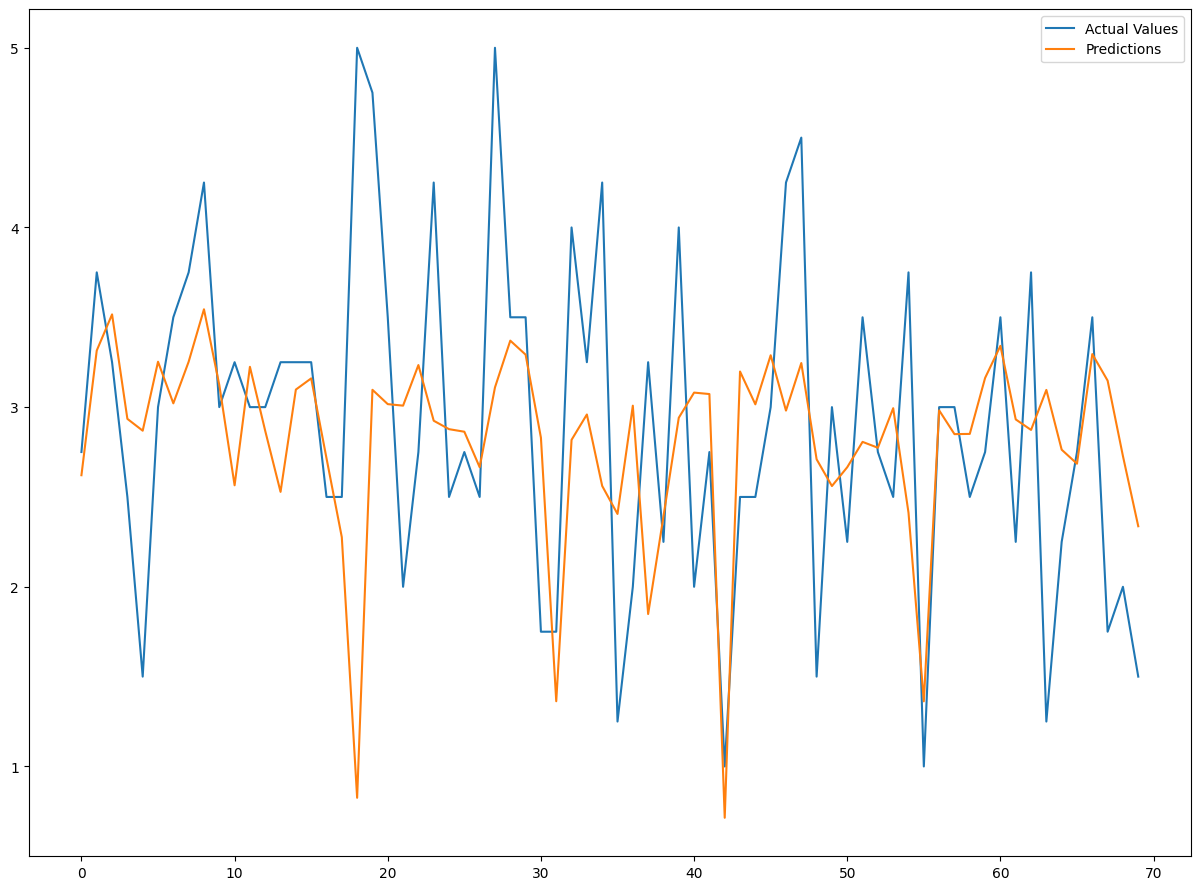

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Convert pandas Series to numpy array and flatten
y_test_np = y_test.values
y_pred_np = y_pred.flatten()

# Plot predictions and actual values with larger size
fig, ax = plt.subplots(figsize=(15, 11))
ax.plot(y_test_np, label='Actual Values')
ax.plot(y_pred_np, label='Predictions')
ax.legend()
plt.show()


### CNN

In [ ]:
X1 = np.expand_dims(X, axis=2)
X1.shape

(350, 6, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras import backend as K

def swish(x, beta=0.7):
    return x * K.sigmoid(beta * x)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=42)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.activations import relu
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


#model
model = Sequential()
model.add(Conv1D(filters=64,padding='same',kernel_size=3, activation=swish, input_shape=(6,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation=swish))
model.add(Conv1D(filters=32, kernel_size=2, activation=swish))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation=swish))
model.add(Dense(units=1, activation=swish))

# Compile model
model.compile(loss='mean_squared_error', optimizer='SGD')

# Train model
model.fit(X_train, y_train, epochs=500, batch_size=62, validation_data=(X_test, y_test), verbose=0)

# Evaluate model on test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)



3/3 [==============================] - 0s 4ms/step
MAE: 0.6665853704724993
RMSE: 0.8608200475127503
R2: 0.1339920921640253


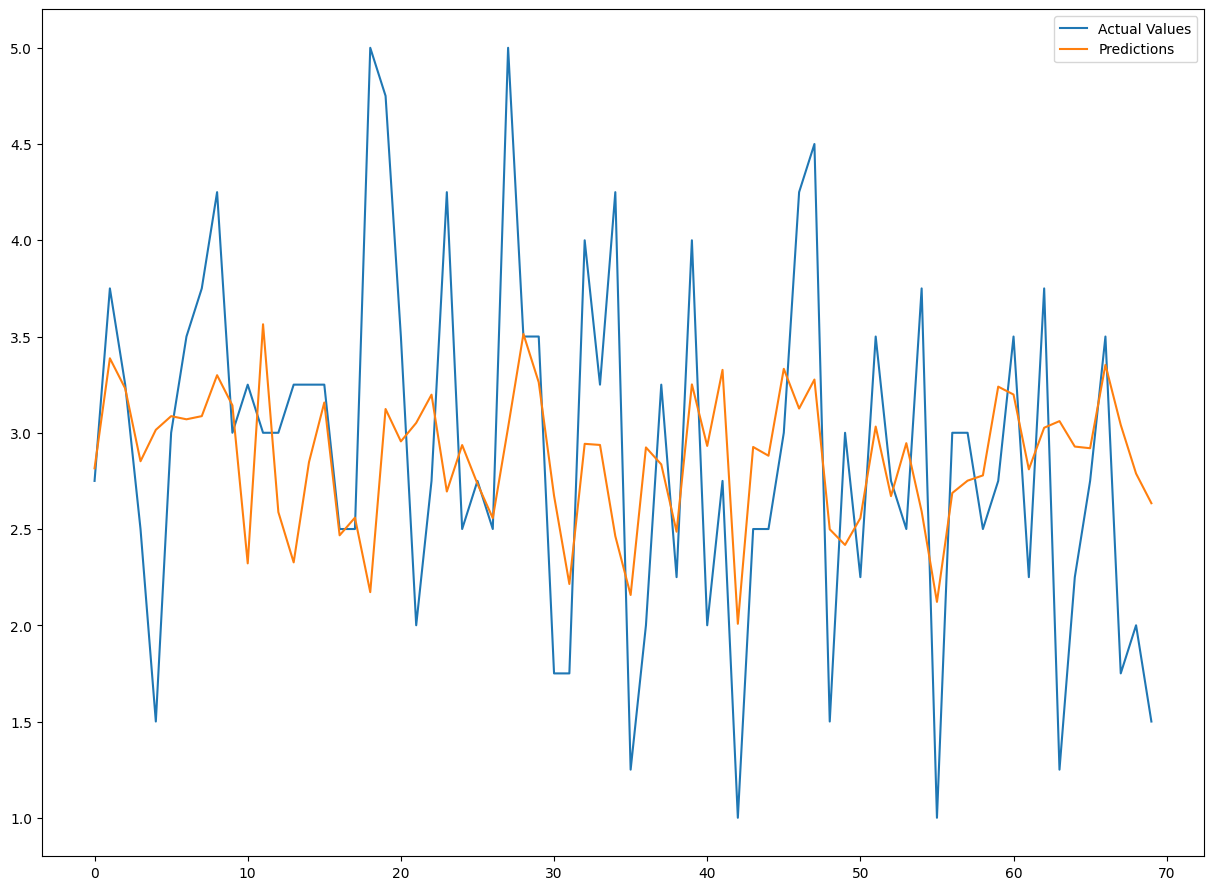

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y_test_np = y_test.values
y_pred_np = y_pred.flatten()

# Plot predictions and actual values with larger size
fig, ax = plt.subplots(figsize=(15, 11))
ax.plot(y_test_np, label='Actual Values')
ax.plot(y_pred_np, label='Predictions')
ax.legend()
plt.show()


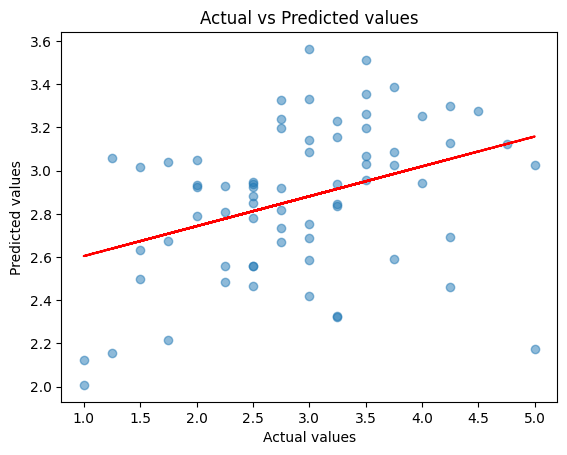

In [ ]:
# Create scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)

# Add line of best fit
p = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(p, y_test), 'r--')

# Set plot labels and title
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')

# Show plot
plt.show()


## df2

In [ ]:
#df2 -> One Hot Encoding
df2= pd.merge(demo2, s_acc_Score, on='ID')
df2 = pd.merge(df2, s_acd_score, on='ID')
df2['Scaled_Acd_score']=df2['Scaled_Acd_score']
df2['Scaled_Acc_score']=df2['Scaled_Acc_score']
df2

,ID,"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)","Doctorate (PhD, M.Phil)","Master's degree (MCA, MBA, M.Tech, MSc...)",Post Graduate Diploma,Business/Administration,Commerce/Accounting,Engineering,Mathematics/Statistics,Other,...,None,Female,Male,Prefer not to say,18-25,26-35,36-45,45 and above,Scaled_Acc_score,Scaled_Acd_score
0,119,1,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0.92,0.6
1,168,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0.68,0.5
2,174,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0.68,0.7
3,103,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0.68,0.7
4,8,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0.80,0.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,2,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.80,0.7
346,70,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0.52,0.7
347,343,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0.56,0.5
348,11,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0.80,0.85


### FFNN

In [ ]:
df2=df2.astype(float)
X=df2.drop(['ID','Scaled_Acd_score'],axis=1)
y=df2['Scaled_Acd_score']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras import backend as K

def swish(x, beta=2):
    return x * K.sigmoid(beta * x)

#sc = StandardScaler()
#x = sc.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation=swish))
model.add(Dropout(0.5))
model.add(Dense(512, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(256, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(128, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(64, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(1, activation=swish))
model.compile(loss='mean_squared_error', optimizer="nadam")

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the rounded predicted values and actual test values side by side
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
print("R-squared:", r2)

Epoch 1/500
5/5 [==============================] - 4s 17ms/step - loss: 0.2906
Epoch 2/500
5/5 [==============================] - 0s 17ms/step - loss: 0.0868
Epoch 3/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0790
Epoch 4/500
5/5 [==============================] - 0s 17ms/step - loss: 0.0733
Epoch 5/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0650
Epoch 6/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0688
Epoch 7/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0576
Epoch 8/500
5/5 [==============================] - 0s 15ms/step - loss: 0.0641
Epoch 9/500
5/5 [==============================] - 0s 15ms/step - loss: 0.0629
Epoch 10/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0547
Epoch 11/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0590
Epoch 12/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0500
Epoch 13/500
5/5 [==============================]

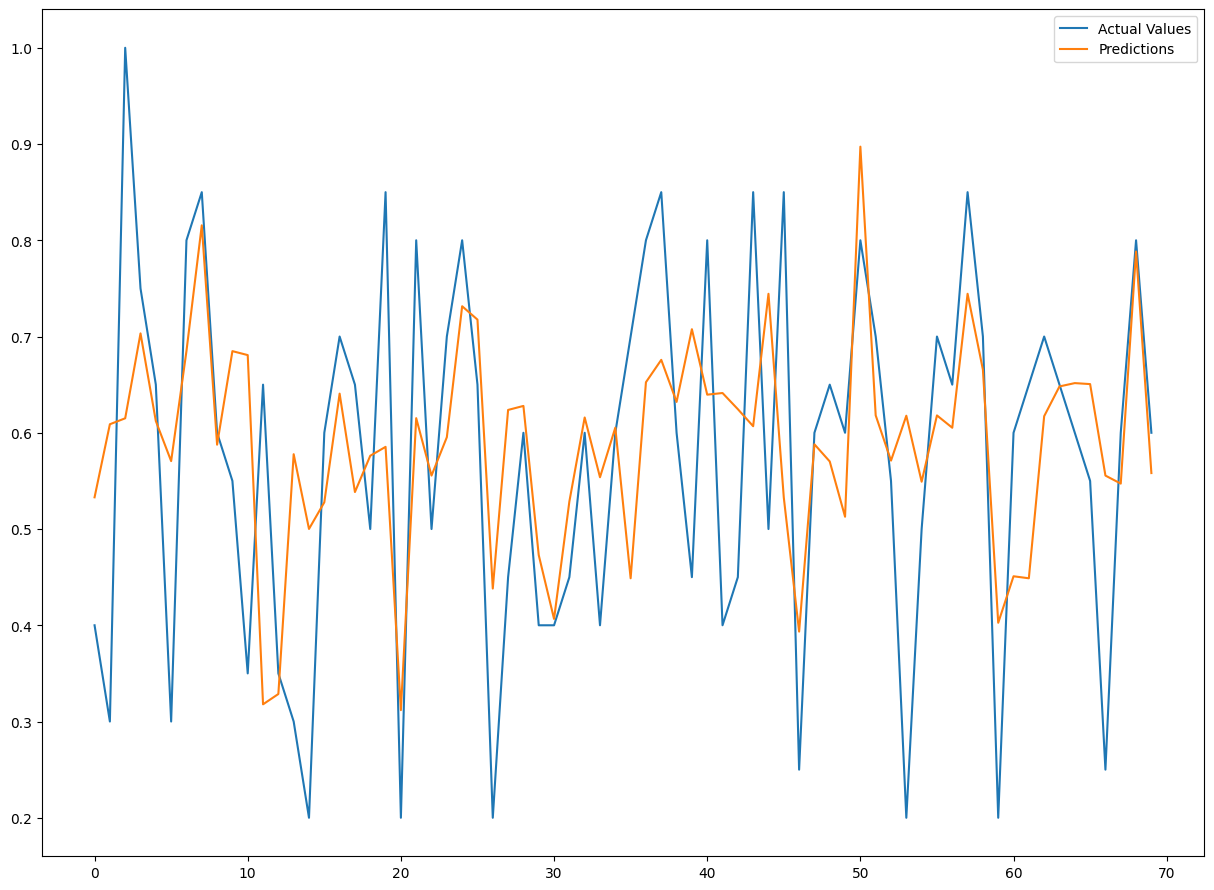

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y_test_np = y_test.values
y_pred_np = y_pred.flatten()

# Plot predictions and actual values with larger size
fig, ax = plt.subplots(figsize=(15, 11))
ax.plot(y_test_np, label='Actual Values')
ax.plot(y_pred_np, label='Predictions')
ax.legend()
plt.show()


### CNN

In [ ]:
X1 = np.expand_dims(X, axis=2)
X1.shape

(350, 25, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras import backend as K

def swish(x, beta=0.1):
    return x * K.sigmoid(beta * x)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=42)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.activations import relu
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define model architecture
model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, activation=relu, input_shape=(25,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation=swish))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, activation=swish))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation=swish))
model.add(Dense(units=1, activation=swish))

# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
model.fit(X_train, y_train, epochs=250, batch_size=62, validation_data=(X_test, y_test), verbose=0)

# Evaluate model on test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


3/3 [==============================] - 0s 6ms/step
MAE: 0.1765531246151243
RMSE: 0.21403628617889053
R2: -0.203885583107017


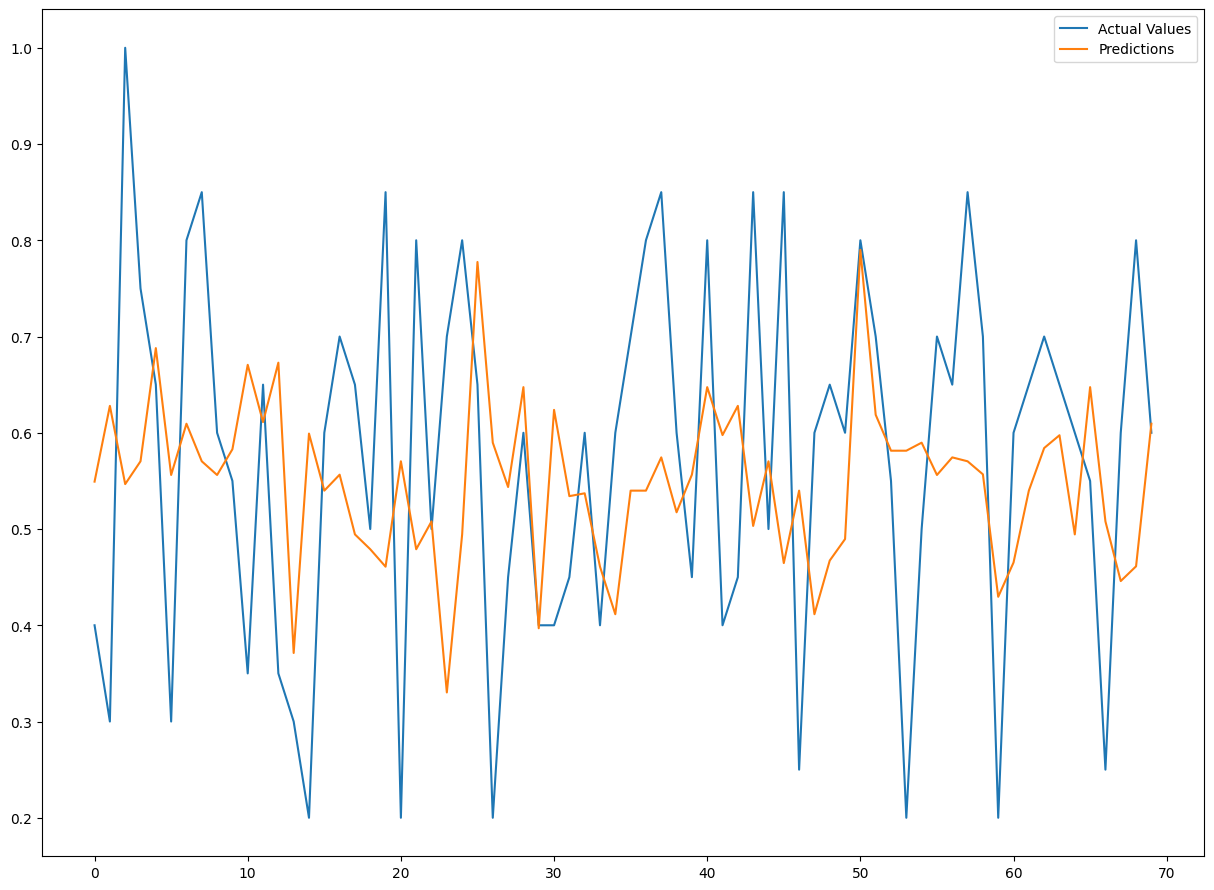

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y_test_np = y_test.values
y_pred_np = y_pred.flatten()

# Plot predictions and actual values with larger size
fig, ax = plt.subplots(figsize=(15, 11))
ax.plot(y_test_np, label='Actual Values')
ax.plot(y_pred_np, label='Predictions')
ax.legend()
plt.show()


## df3

In [ ]:
#df3 -> Mixed Encoding
df3= pd.merge(demo1, s_acc_Score, on='ID')
df3 = pd.merge(df3, s_acd_score, on='ID')
df3

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Scaled_Acc_score,Scaled_Acd_score
0,119,0,0,0,0,1,0.92,0.6
1,168,1,0,1,1,1,0.68,0.5
2,174,0,0,1,1,2,0.68,0.7
3,103,0,0,1,1,2,0.68,0.7
4,8,0,0,2,1,1,0.80,0.55
...,...,...,...,...,...,...,...,...
345,2,2,6,2,1,1,0.80,0.7
346,70,0,6,2,1,2,0.52,0.7
347,343,2,6,2,2,1,0.56,0.5
348,11,2,6,3,1,1,0.80,0.85


In [ ]:
df3=df3.astype('float')
X=df3.drop(['ID','Scaled_Acd_score'],axis=1)
y=df3['Scaled_Acd_score']

### FFNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras import backend as K

def swish(x, beta=2):
    return x * K.sigmoid(beta * x)

sc = StandardScaler()
x = sc.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

# model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation=swish))
model.add(Dropout(0.5))
model.add(Dense(512, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(256, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(128, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(64, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(1, activation=swish))
model.compile(loss='mean_squared_error', optimizer="nadam")

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the rounded predicted values and actual test values side by side
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
print("R-squared:", r2)

Epoch 1/500
5/5 [==============================] - 7s 21ms/step - loss: 0.3503
Epoch 2/500
5/5 [==============================] - 0s 18ms/step - loss: 0.2848
Epoch 3/500
5/5 [==============================] - 0s 17ms/step - loss: 0.1647
Epoch 4/500
5/5 [==============================] - 0s 18ms/step - loss: 0.1196
Epoch 5/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0986
Epoch 6/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0938
Epoch 7/500
5/5 [==============================] - 0s 17ms/step - loss: 0.0770
Epoch 8/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0785
Epoch 9/500
5/5 [==============================] - 0s 17ms/step - loss: 0.0718
Epoch 10/500
5/5 [==============================] - 0s 18ms/step - loss: 0.0662
Epoch 11/500
5/5 [==============================] - 0s 20ms/step - loss: 0.0665
Epoch 12/500
5/5 [==============================] - 0s 16ms/step - loss: 0.0609
Epoch 13/500
5/5 [==============================]

3/3 [==============================] - 0s 6ms/step
Mean squared error: 0.0310227137561237
Mean absolute error: 0.14401318635259355
Root mean squared error: 0.17613265953855264
R-squared: 0.18475116697948024


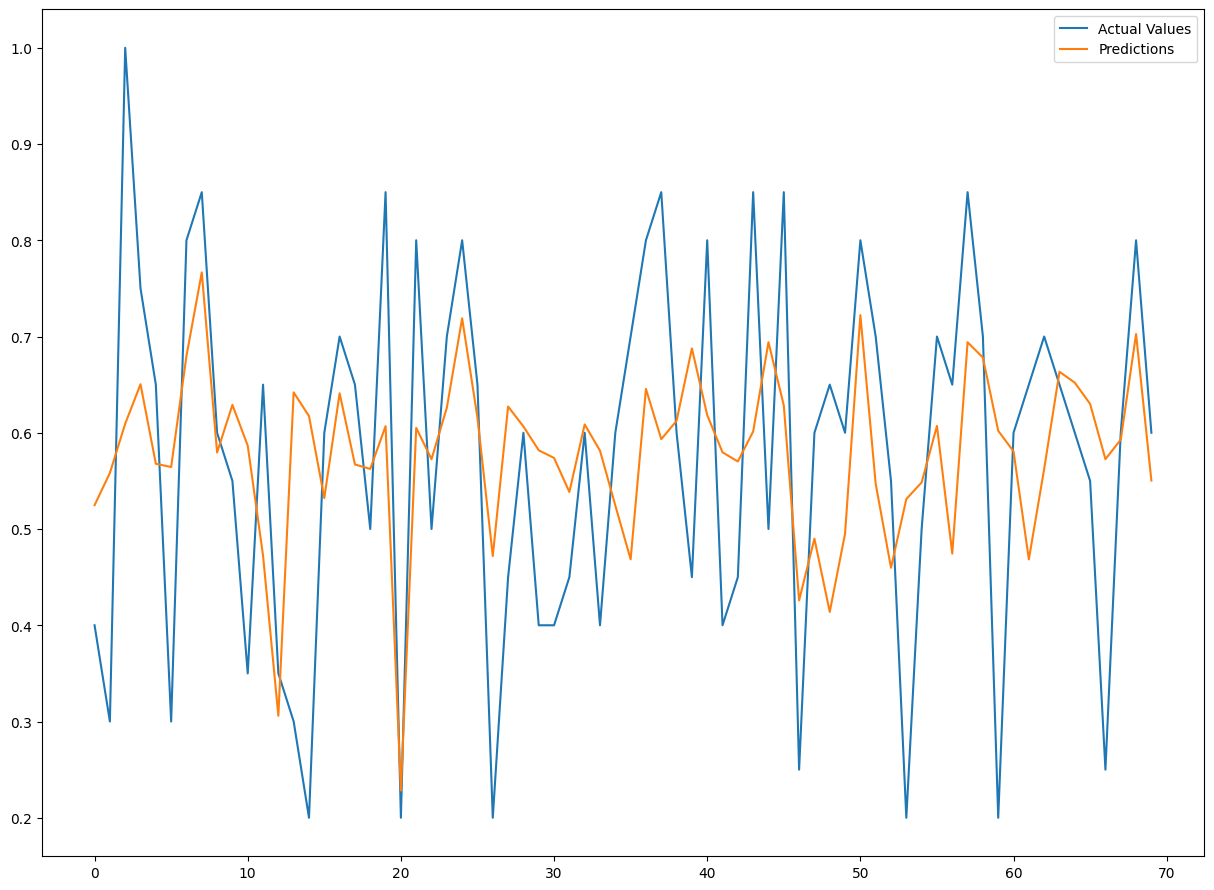

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y_test_np = y_test.values
y_pred_np = y_pred.flatten()

# Plot predictions and actual values with larger size
fig, ax = plt.subplots(figsize=(15, 11))
ax.plot(y_test_np, label='Actual Values')
ax.plot(y_pred_np, label='Predictions')
ax.legend()
plt.show()


### CNN

In [ ]:
X1 = np.expand_dims(X, axis=2)
X1.shape

(350, 6, 1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras import backend as K

def swish(x, beta=0.01):
    return x * K.sigmoid(beta * x)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=42)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.activations import relu
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# model
model = Sequential()
model.add(Conv1D(filters=64,padding='same',kernel_size=3, activation=relu, input_shape=(6,1)))
model.add(Conv1D(filters=64, kernel_size=3, activation=swish))
model.add(Conv1D(filters=32, kernel_size=2, activation=swish))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=64, activation=swish))
model.add(Dense(units=1, activation=swish))

# Compile model
model.compile(loss='mean_squared_error', optimizer='nadam')

# Train model
model.fit(X_train, y_train, epochs=250, batch_size=62, validation_data=(X_test, y_test), verbose=0)

# Evaluate model on test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)


3/3 [==============================] - 0s 5ms/step
MAE: 0.14959242394992284
RMSE: 0.1815069464164928
R2: 0.13424122692559304


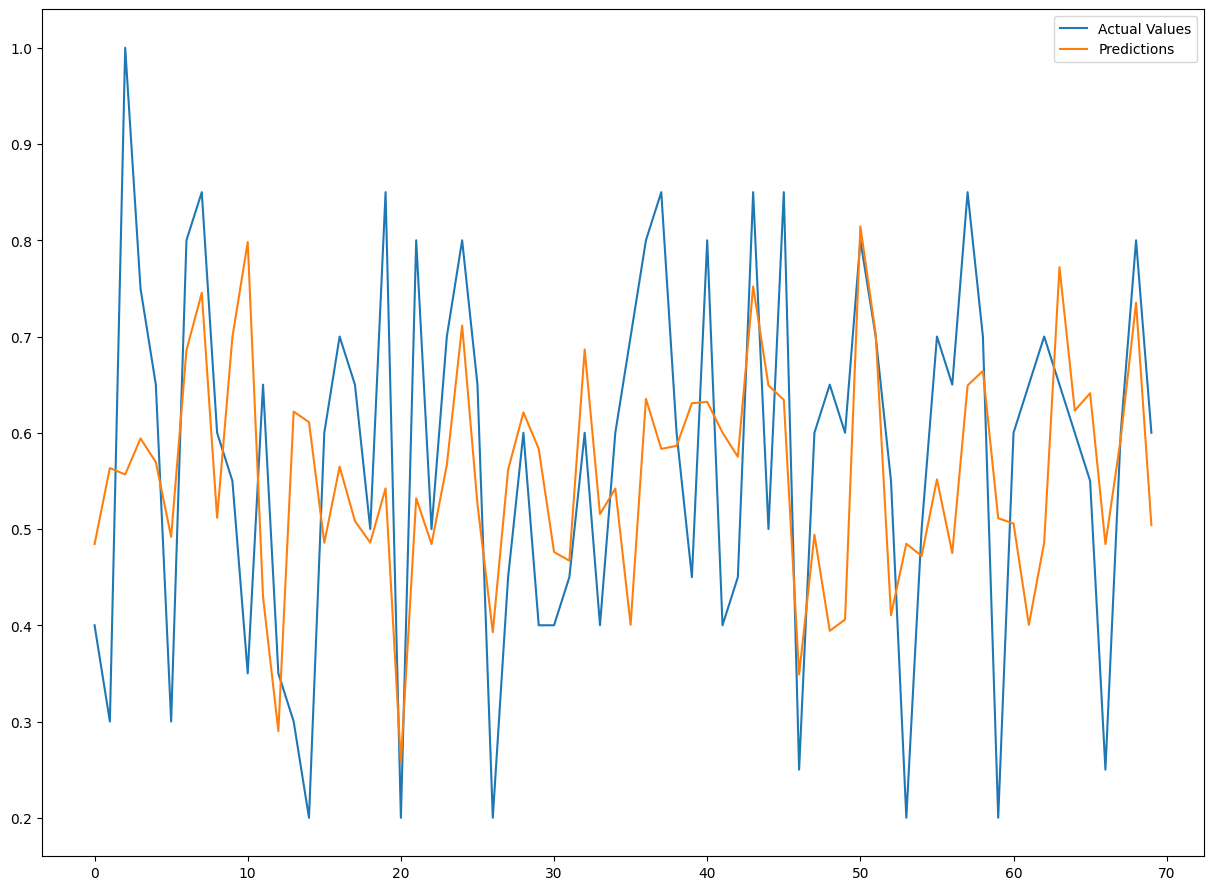

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
y_test_np = y_test.values
y_pred_np = y_pred.flatten()

# Plot predictions and actual values with larger size
fig, ax = plt.subplots(figsize=(15, 11))
ax.plot(y_test_np, label='Actual Values')
ax.plot(y_pred_np, label='Predictions')
ax.legend()
plt.show()
